# SVM

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

## Loadinf the dataset

In [2]:
# Load the dataset
df_raw = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\5th sem\AIML\smoking.csv")

## preprocessing

In [3]:
# Data Preprocessing
# Assuming you have some missing values in 'amt_weekends' and 'amt_weekdays,' let's fill them with the median.
df_raw['amt_weekends'].fillna(df_raw['amt_weekends'].median(), inplace=True)
df_raw['amt_weekdays'].fillna(df_raw['amt_weekdays'].median(), inplace=True)

In [4]:
# Convert categorical variables into numerical using one-hot encoding
df_encoded = pd.get_dummies(df_raw, columns=['gender', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'gross_income', 'region', 'type'])

## Data splitting

In [5]:
# Split the dataset into features (X) and the target variable (y)
X = df_encoded.drop('smoke', axis=1)
y = df_encoded['smoke']

In [6]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## creating SVM model

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC  # for classification
# from sklearn.svm import SVR  # for regression

# Create an SVM classifier (for classification)
clf = SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# If you are doing regression, use SVR instead of SVC and adjust parameters accordingly.

SVC(kernel='linear')

## Calculating accuracy, confusion matrix, and claassification report

In [9]:
from sklearn.metrics import accuracy_score, mean_squared_error

# For classification
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# For regression
# y_pred = clf.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')


Accuracy: 1.0


In [10]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       258
         Yes       1.00      1.00      1.00        81

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339



In [11]:
# Compute confusion matrix
confusion = confusion_matrix(y_test, y_pred)

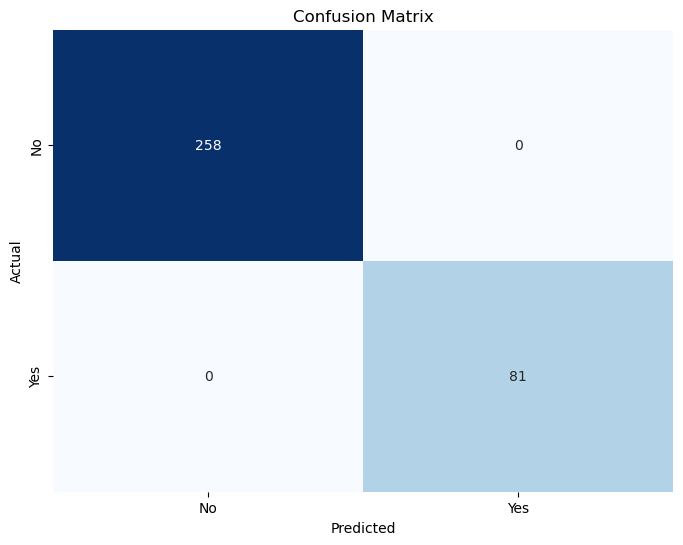

In [12]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()